Dataset Loaded Successfully! Shape: (5172, 3002)
After cleaning: (5172, 3000)
Unique Target Values: [0 1]

Train size: (3620, 3000), Test size: (1552, 3000)

Confusion Matrix (Normal / Spam):
 [[1039   63]
 [  26  424]]

Evaluation Metrics:
Accuracy:  0.9427
Precision: 0.8706
Recall:    0.9422
F1-Score:  0.9050


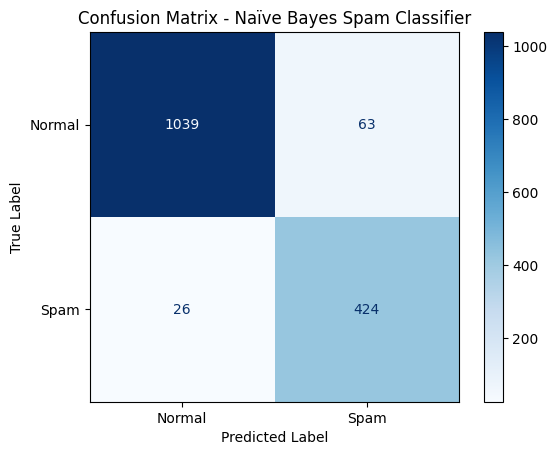

In [ ]:
#16. Apply the Naïve Bayes algorithm to a real-world classification problem such as email spam
#detection, sentiment analysis, or disease diagnosis. Train and test the model, then evaluate its
#performance using a Confusion Matrix and related metrics such as accuracy, precision, recall, and
#F1-score.

# ================================================================
# Email Spam Detection using Naïve Bayes (with sklearn)
# ================================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 1. Load Dataset
# ---------------------------------------------------------------
df = pd.read_csv("emails.csv")
print("Dataset Loaded Successfully! Shape:", df.shape)

# ---------------------------------------------------------------
# 2. Prepare Features and Target
# ---------------------------------------------------------------
X = df.drop(columns=["Prediction", "Email No."])
y = df["Prediction"]

# Remove missing values if any
data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns=["Prediction"])
y = data["Prediction"]

print("After cleaning:", X.shape)
print("Unique Target Values:", y.unique())

# ---------------------------------------------------------------
# 3. Train-Test Split
# ---------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"\nTrain size: {X_train.shape}, Test size: {X_test.shape}")

# ---------------------------------------------------------------
# 4. Feature Check (Ensure Non-Negative Values)
# ---------------------------------------------------------------
# MultinomialNB requires non-negative features (like word counts)
X_train[X_train < 0] = 0
X_test[X_test < 0] = 0

# ---------------------------------------------------------------
# 5. Train Naïve Bayes Model
# ---------------------------------------------------------------
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# ---------------------------------------------------------------
# 6. Predict on Test Data
# ---------------------------------------------------------------
y_pred = nb_model.predict(X_test)

# ---------------------------------------------------------------
# 7. Evaluate Model
# ---------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nConfusion Matrix (Normal / Spam):\n", cm)
print("\nEvaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# ---------------------------------------------------------------
# 8. Visualize Confusion Matrix
# ---------------------------------------------------------------
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Spam"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Naïve Bayes Spam Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Dataset Loaded Successfully! Shape: (499, 7)
   Year  Month  Day Time of Tweet  \
0  2018      8   18       morning   
1  2018      8   18          noon   
2  2017      8   18         night   
3  2022      6    8       morning   
4  2022      6    8          noon   

                                                text sentiment     Platform  
0              What a great day!!! Looks like dream.  positive    Twitter    
1     I feel sorry, I miss you here in the sea beach  positive    Facebook   
2                                     Don't angry me  negative     Facebook  
3  We attend in the class just for listening teac...  negative    Facebook   
4                  Those who want to go, let them go  negative   Instagram   

Unique Sentiments: ['positive' 'negative' 'neutral']

Train size: (349, 1230), Test size: (150, 1230)

Confusion Matrix:
 [[17 13 10]
 [ 6 46  8]
 [ 4 14 32]]

Evaluation Metrics:
Accuracy:  0.6333
Precision: 0.6333
Recall:    0.6333
F1-Score:  0.6253


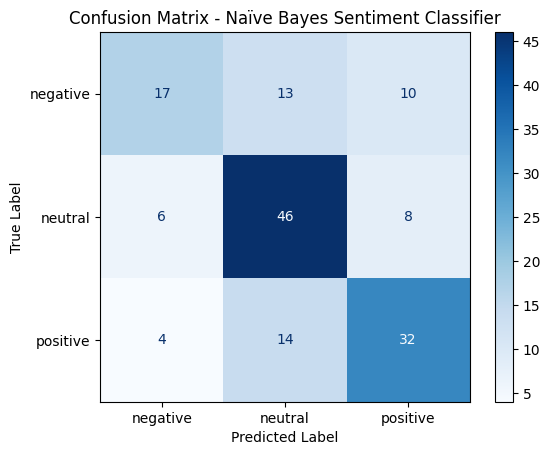

In [ ]:
# ================================================================
# Sentiment Analysis using Naïve Bayes (with sklearn)
# ================================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 1. Load Dataset
# ---------------------------------------------------------------
df = pd.read_csv("sentiment_analysis_16_17.csv")
print("Dataset Loaded Successfully! Shape:", df.shape)
print(df.head())

# ---------------------------------------------------------------
# 2. Select Text and Target
# ---------------------------------------------------------------
X = df["text"]            # Input text (tweets/posts)
y = df["sentiment"]       # Target sentiment: positive / negative / neutral

print("\nUnique Sentiments:", y.unique())

# ---------------------------------------------------------------
# 3. Text Vectorization (Convert text to numerical form)
# ---------------------------------------------------------------
vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)

# ---------------------------------------------------------------
# 4. Split Dataset into Train/Test
# ---------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.3, random_state=42, stratify=y
)
print(f"\nTrain size: {X_train.shape}, Test size: {X_test.shape}")

# ---------------------------------------------------------------
# 5. Train Naïve Bayes Model
# ---------------------------------------------------------------
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# ---------------------------------------------------------------
# 6. Predict on Test Data
# ---------------------------------------------------------------
y_pred = nb_model.predict(X_test)

# ---------------------------------------------------------------
# 7. Evaluate Model
# ---------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nConfusion Matrix:\n", cm)
print("\nEvaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# ---------------------------------------------------------------
# 8. Visualize Confusion Matrix
# ---------------------------------------------------------------
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Naïve Bayes Sentiment Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Dataset Loaded Successfully! Shape: (2000, 13)
   Patient_ID  Age  Gender            Symptom_1    Symptom_2 Symptom_3  \
0           1   74    Male              Fatigue  Sore throat     Fever   
1           2   66  Female          Sore throat      Fatigue     Cough   
2           3   32    Male            Body ache  Sore throat   Fatigue   
3           4   21  Female  Shortness of breath     Headache     Cough   
4           5   53    Male           Runny nose  Sore throat   Fatigue   

   Heart_Rate_bpm  Body_Temperature_C Blood_Pressure_mmHg  \
0              69                39.4              132/91   
1              95                39.0              174/98   
2              77                36.8              136/60   
3              72                38.9              147/82   
4             100                36.6             109/106   

   Oxygen_Saturation_% Diagnosis  Severity       Treatment_Plan  
0                   94       Flu  Moderate  Medication and rest  
1        

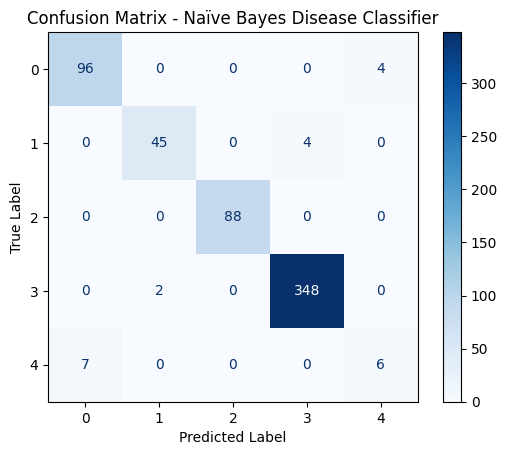

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# --------------------------------------------------------------
# 1. Load Dataset
# --------------------------------------------------------------
df = pd.read_csv("disease_diagnosis_16_17.csv")
print("Dataset Loaded Successfully! Shape:", df.shape)
print(df.head())

# --------------------------------------------------------------
# 2. Data Preprocessing
# --------------------------------------------------------------

# Drop irrelevant columns
df = df.drop(columns=["Patient_ID", "Treatment_Plan"])

# Convert categorical columns to numeric using LabelEncoder
le = LabelEncoder()
categorical_cols = ["Gender", "Symptom_1", "Symptom_2", "Symptom_3", "Diagnosis", "Severity"]
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Split blood pressure into two numeric columns (Systolic/Diastolic)
bp_split = df["Blood_Pressure_mmHg"].str.split("/", expand=True).astype(float)
df["BP_Systolic"] = bp_split[0]
df["BP_Diastolic"] = bp_split[1]
df = df.drop(columns=["Blood_Pressure_mmHg"])

print("\nPreprocessed Columns:", df.columns)

# --------------------------------------------------------------
# 3. Define Features (X) and Target (y)
# --------------------------------------------------------------
X = df.drop(columns=["Diagnosis"])   # Features
y = df["Diagnosis"]                 # Target variable
print("\nUnique Diagnosis Classes:", y.unique())

# --------------------------------------------------------------
# 4. Split Data into Training and Testing Sets
# --------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"\nTrain size: {X_train.shape}, Test size: {X_test.shape}")

# --------------------------------------------------------------
# 5. Train Naïve Bayes Model
# --------------------------------------------------------------
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# --------------------------------------------------------------
# 6. Predict on Test Data
# --------------------------------------------------------------
y_pred = nb_model.predict(X_test)

# --------------------------------------------------------------
# 7. Evaluate Model
# --------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nConfusion Matrix:")
print(cm)

print("\nEvaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# --------------------------------------------------------------
# 8. Visualize Confusion Matrix
# --------------------------------------------------------------
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=True)
plt.title("Confusion Matrix - Naïve Bayes Disease Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



Confusion Matrix (rows=actual, cols=predicted):
[0 1]
[[   4 1081]
 [   0  467]]

Evaluation Metrics:
Accuracy : 0.3035
Precision: 0.6508
Recall   : 0.6508
F1-Score : 0.6508


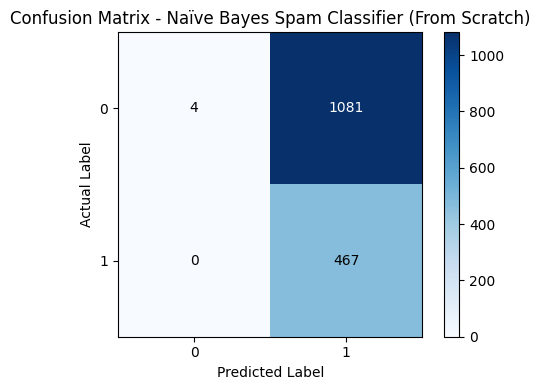

Dataset Loaded Successfully! Shape: (394, 2)
Unique Sentiments: ['positive' 'negative' 'neutral']

Train size: 275, Test size: 119

Confusion Matrix (rows=actual, cols=predicted):
['negative', 'neutral', 'positive']
[[ 9 21  6]
 [ 6 28 14]
 [ 3 15 17]]

Accuracy: 0.4538
Negative → Precision: 0.5000, Recall: 0.2500, F1: 0.3333
Neutral → Precision: 0.4375, Recall: 0.5833, F1: 0.5000
Positive → Precision: 0.4595, Recall: 0.4857, F1: 0.4722


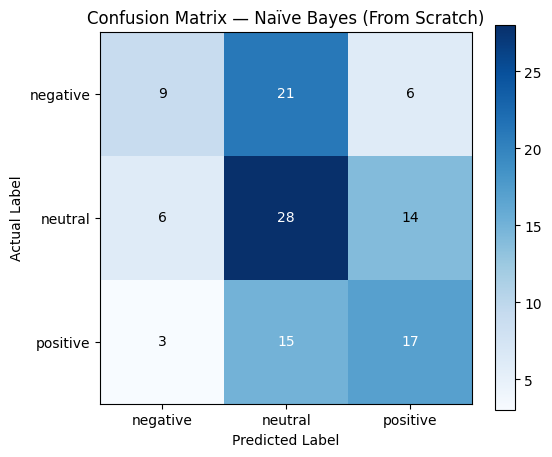

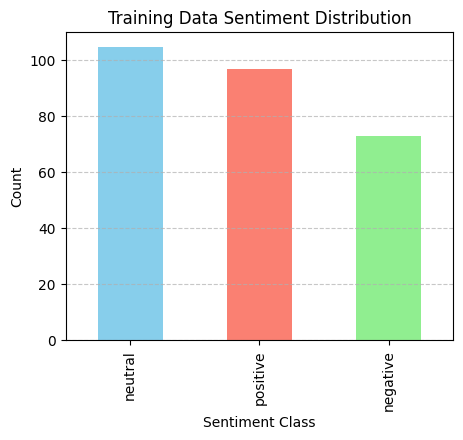

Dataset Loaded Successfully! Shape: (2000, 13)

First 5 Rows:
    Patient_ID  Age  Gender            Symptom_1    Symptom_2 Symptom_3  \
0           1   74    Male              Fatigue  Sore throat     Fever   
1           2   66  Female          Sore throat      Fatigue     Cough   
2           3   32    Male            Body ache  Sore throat   Fatigue   
3           4   21  Female  Shortness of breath     Headache     Cough   
4           5   53    Male           Runny nose  Sore throat   Fatigue   

   Heart_Rate_bpm  Body_Temperature_C Blood_Pressure_mmHg  \
0              69                39.4              132/91   
1              95                39.0              174/98   
2              77                36.8              136/60   
3              72                38.9              147/82   
4             100                36.6             109/106   

   Oxygen_Saturation_% Diagnosis  Severity       Treatment_Plan  
0                   94       Flu  Moderate  Medication and 

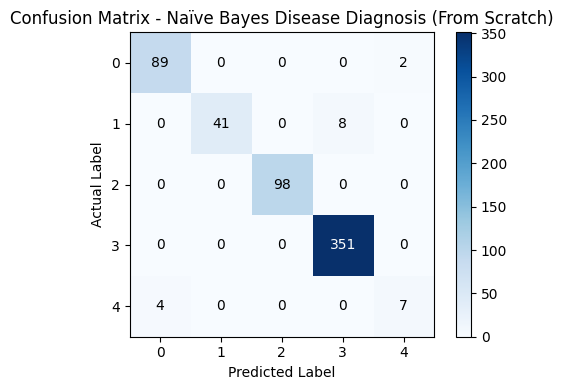

In [ ]:
#ASS17. Implement the Naïve Bayes algorithm from scratch to solve a real-world classification problem
#such as email spam detection, sentiment analysis, or disease diagnosis.

# ==========================================================
# Email Spam Detection using Naïve Bayes (Fully From Scratch)
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# 1. Load and Prepare Data
# ----------------------------------------------------------
df = pd.read_csv("email.csv")
X = df.drop(columns=["Prediction", "Email No."])
y = df["Prediction"]

data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns=["Prediction"]).values
y = data["Prediction"].values

np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)
split = int(0.7 * len(X))
X_train, X_test = X[indices[:split]], X[indices[split:]]
y_train, y_test = y[indices[:split]], y[indices[split:]]

# ----------------------------------------------------------
# 2. Naïve Bayes Implementation (From Scratch)
# ----------------------------------------------------------
class NaiveBayesScratch:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = {c: np.mean(y == c) for c in self.classes}
        self.mean = {}
        self.var = {}
        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] = X_c.var(axis=0) + 1e-9  # avoid zero variance

    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _predict_single(self, x):
        eps = 1e-9
        posteriors = []
        for c in self.classes:
            prior = np.log(self.class_priors[c] + eps)
            probs = self._pdf(c, x)
            probs = np.clip(probs, eps, None)
            likelihood = np.sum(np.log(probs))
            posteriors.append(prior + likelihood)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

# ----------------------------------------------------------
# 3. Train and Predict
# ----------------------------------------------------------
nb_model = NaiveBayesScratch()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# ----------------------------------------------------------
# 4. Evaluate Manually
# ----------------------------------------------------------
classes = np.unique(y_test)
label_to_index = {label: i for i, label in enumerate(classes)}
cm = np.zeros((len(classes), len(classes)), dtype=int)

for actual, pred in zip(y_test, y_pred):
    cm[label_to_index[actual]][label_to_index[pred]] += 1

tp = cm[1, 1] if len(classes) == 2 else np.diag(cm)
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)

accuracy = np.trace(cm) / np.sum(cm)
precision = np.mean(tp / (tp + fp + 1e-9))
recall = np.mean(tp / (tp + fn + 1e-9))
f1 = 2 * precision * recall / (precision + recall + 1e-9)

print("\nConfusion Matrix (rows=actual, cols=predicted):")
print(classes)
print(cm)
print("\nEvaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

# ----------------------------------------------------------
# 5. Visualize Confusion Matrix
# ----------------------------------------------------------
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix - Naïve Bayes Spam Classifier (From Scratch)")
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")

plt.colorbar()
plt.tight_layout()
plt.show()


# ==============================================================
# Naïve Bayes Sentiment Analysis from Scratch + Visualization
# Dataset: sentinel.csv (columns: text, sentiment)
# ==============================================================

import pandas as pd
import numpy as np
import re
from collections import Counter, defaultdict
import math
import matplotlib.pyplot as plt

# --------------------------------------------------------------
# 1. Load Dataset
# --------------------------------------------------------------
df = pd.read_csv("sentiment.csv", usecols=['text', 'sentiment'])
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

print("Dataset Loaded Successfully! Shape:", df.shape)
print("Unique Sentiments:", df['sentiment'].unique())

# --------------------------------------------------------------
# 2. Preprocess Function
# --------------------------------------------------------------
def preprocess(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text.split()

# --------------------------------------------------------------
# 3. Manual Train-Test Split (70–30)
# --------------------------------------------------------------
np.random.seed(42)
indices = np.random.permutation(len(df))
split = int(0.7 * len(df))
train_idx, test_idx = indices[:split], indices[split:]

train_data = df.iloc[train_idx]
test_data = df.iloc[test_idx]

print(f"\nTrain size: {len(train_data)}, Test size: {len(test_data)}")

# --------------------------------------------------------------
# 4. Train Naïve Bayes Model (from scratch)
# --------------------------------------------------------------
def train_naive_bayes(data):
    class_word_counts = defaultdict(Counter)
    class_counts = Counter()
    vocab = set()

    for _, row in data.iterrows():
        label = row['sentiment']
        words = preprocess(row['text'])
        class_counts[label] += 1
        class_word_counts[label].update(words)
        vocab.update(words)

    total_docs = sum(class_counts.values())
    priors = {label: class_counts[label] / total_docs for label in class_counts}
    total_words = {label: sum(class_word_counts[label].values()) for label in class_counts}

    return vocab, class_word_counts, total_words, priors

vocab, class_word_counts, total_words, priors = train_naive_bayes(train_data)
vocab_size = len(vocab)

# --------------------------------------------------------------
# 5. Likelihood with Laplace Smoothing
# --------------------------------------------------------------
def word_likelihood(word, label):
    return (class_word_counts[label][word] + 1) / (total_words[label] + vocab_size)

# --------------------------------------------------------------
# 6. Prediction Function
# --------------------------------------------------------------
def predict(text):
    words = preprocess(text)
    scores = {}
    for label in priors:
        score = math.log(priors[label])
        for word in words:
            if word in vocab:
                score += math.log(word_likelihood(word, label))
        scores[label] = score
    return max(scores, key=scores.get)

# --------------------------------------------------------------
# 7. Evaluate Model
# --------------------------------------------------------------
y_true = test_data['sentiment'].tolist()
y_pred = [predict(t) for t in test_data['text']]

labels = sorted(list(set(y_true)))
label_to_index = {label: i for i, label in enumerate(labels)}

# Confusion Matrix
cm = np.zeros((len(labels), len(labels)), dtype=int)
for actual, pred in zip(y_true, y_pred):
    cm[label_to_index[actual]][label_to_index[pred]] += 1

# Accuracy / Precision / Recall / F1
correct = sum(a == b for a, b in zip(y_true, y_pred))
accuracy = correct / len(y_true)

precision, recall, f1 = {}, {}, {}
for label in labels:
    i = label_to_index[label]
    tp = cm[i, i]
    fp = sum(cm[:, i]) - tp
    fn = sum(cm[i, :]) - tp
    precision[label] = tp / (tp + fp + 1e-9)
    recall[label] = tp / (tp + fn + 1e-9)
    f1[label] = 2 * precision[label] * recall[label] / (precision[label] + recall[label] + 1e-9)

print("\nConfusion Matrix (rows=actual, cols=predicted):")
print(labels)
print(cm)
print(f"\nAccuracy: {accuracy:.4f}")
for label in labels:
    print(f"{label.capitalize()} → Precision: {precision[label]:.4f}, Recall: {recall[label]:.4f}, F1: {f1[label]:.4f}")

# --------------------------------------------------------------
# 8. Visualization
# --------------------------------------------------------------

# (A) Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix — Naïve Bayes (From Scratch)")
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Annotate values
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")
plt.colorbar()
plt.show()

# (B) Class Distribution in Training Data
train_counts = train_data['sentiment'].value_counts()
plt.figure(figsize=(5,4))
train_counts.plot(kind='bar', color=['skyblue','salmon','lightgreen'])
plt.title("Training Data Sentiment Distribution")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# ==========================================================
# Disease Diagnosis using Naïve Bayes (Implemented From Scratch)
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# 1. Load Dataset
# ----------------------------------------------------------
df = pd.read_csv("disease.csv")
print("Dataset Loaded Successfully! Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())

# ----------------------------------------------------------
# 2. Data Preprocessing
# ----------------------------------------------------------
# Split Blood Pressure into Systolic/Diastolic
bp_split = df["Blood_Pressure_mmHg"].str.split("/", expand=True)
df["BP_Systolic"] = pd.to_numeric(bp_split[0], errors='coerce')
df["BP_Diastolic"] = pd.to_numeric(bp_split[1], errors='coerce')

# Drop irrelevant columns
df = df.drop(columns=["Patient_ID", "Blood_Pressure_mmHg", "Treatment_Plan"])

# Encode all categorical columns automatically
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype("category").cat.codes

# Separate features and target
X = df.drop(columns=["Diagnosis"]).values
y = df["Diagnosis"].values

# ----------------------------------------------------------
# 3. Manual Train/Test Split (70/30)
# ----------------------------------------------------------
np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)
split = int(0.7 * len(X))
X_train, X_test = X[indices[:split]], X[indices[split:]]
y_train, y_test = y[indices[:split]], y[indices[split:]]

# ----------------------------------------------------------
# 4. Naïve Bayes Implementation (From Scratch)
# ----------------------------------------------------------
class NaiveBayesScratch:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = {c: np.mean(y == c) for c in self.classes}
        self.mean = {}
        self.var = {}
        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] = X_c.var(axis=0) + 1e-9  # avoid zero variance

    def _pdf(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _predict_single(self, x):
        eps = 1e-9
        posteriors = []
        for c in self.classes:
            prior = np.log(self.class_priors[c] + eps)
            probs = np.clip(self._pdf(c, x), eps, None)
            likelihood = np.sum(np.log(probs))
            posteriors.append(prior + likelihood)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

# ----------------------------------------------------------
# 5. Train and Predict
# ----------------------------------------------------------
nb_model = NaiveBayesScratch()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# ----------------------------------------------------------
# 6. Evaluate Manually
# ----------------------------------------------------------
classes = np.unique(y_test)
label_to_index = {label: i for i, label in enumerate(classes)}
cm = np.zeros((len(classes), len(classes)), dtype=int)

for actual, pred in zip(y_test, y_pred):
    cm[label_to_index[actual]][label_to_index[pred]] += 1

tp = np.diag(cm)
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)

accuracy = np.trace(cm) / np.sum(cm)
precision = np.mean(tp / (tp + fp + 1e-9))
recall = np.mean(tp / (tp + fn + 1e-9))
f1 = 2 * precision * recall / (precision + recall + 1e-9)

print("\nConfusion Matrix:")
print(cm)
print("\nEvaluation Metrics:")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

# ----------------------------------------------------------
# 7. Visualize Confusion Matrix
# ----------------------------------------------------------
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix - Naïve Bayes Disease Diagnosis (From Scratch)")
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], ha="center", va="center",
                 color="white" if cm[i, j] > cm.max()/2 else "black")

plt.colorbar()
plt.tight_layout()
plt.show()

Dataset Loaded Successfully! Shape: (5172, 3002)

Before dropping NaN: (5172, 3002)
After dropping NaN: (5172, 3000)
Unique Target Values: (array([0, 1]), array([3672, 1500]))

Train size: (3620, 3000), Test size: (1552, 3000)

After SMOTE Oversampling: (array([0, 1]), array([2570, 2570]))

Training SVM Model...
Training Complete!

Confusion Matrix (Normal / Spam):
[[1037   65]
 [  57  393]]

Evaluation Metrics:
Accuracy:  0.9214
Precision: 0.8581
Recall:    0.8733
F1-Score:  0.8656
AUC:       0.9826


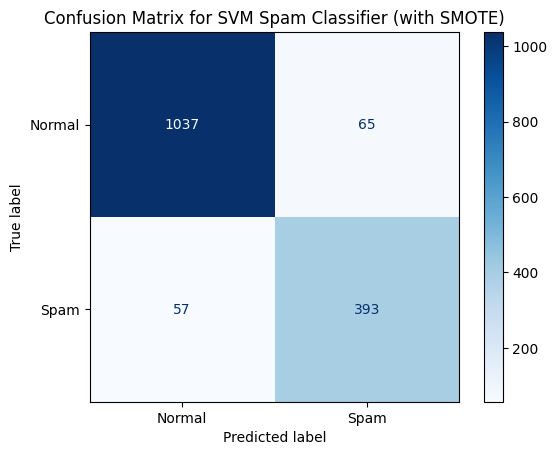

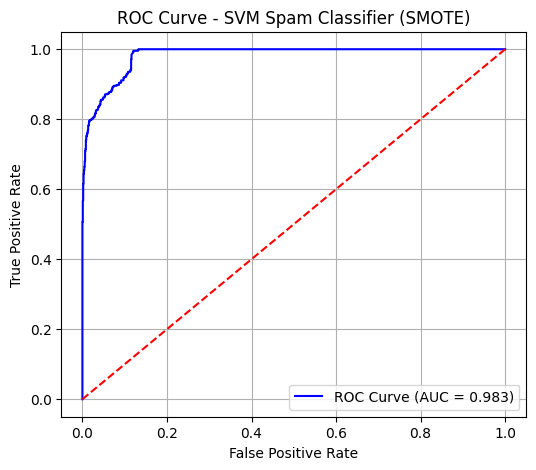

In [ ]:
#ASS18. Implementation an Email Spam Detection model using a Support Vector Machine (SVM) for
#binary classification, where emails are categorized as Normal (Not Spam) or Abnormal (Spam).
#Apply oversampling or undersampling techniques to handle class imbalance and analyze model
#performance using appropriate evaluation metrics.

# ===============================================================
# Email Spam Detection using SVM with Oversampling / Undersampling
# ===============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score,
    f1_score, roc_auc_score, accuracy_score, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# -----------------------------------------------------------
# 1. Load Dataset
# -----------------------------------------------------------
df = pd.read_csv("email.csv")
print("Dataset Loaded Successfully! Shape:", df.shape)

# -----------------------------------------------------------
# 2. Separate Features and Target
# -----------------------------------------------------------
X = df.drop(columns=["Prediction", "Email No."])
y = df["Prediction"]

# -----------------------------------------------------------
# 3. Handle Missing Values (if any)
# -----------------------------------------------------------
print("\nBefore dropping NaN:", df.shape)
combined = pd.concat([X, y], axis=1)
combined = combined.dropna(subset=["Prediction"])  # drop unlabeled rows
combined = combined.dropna()  # drop rows with NaN features

# Split back
X = combined.drop(columns=["Prediction"])
y = combined["Prediction"]

print("After dropping NaN:", X.shape)
print("Unique Target Values:", np.unique(y, return_counts=True))

# -----------------------------------------------------------
# 4. Split Data into Train/Test
# -----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTrain size: {X_train.shape}, Test size: {X_test.shape}")

# -----------------------------------------------------------
# 5. Feature Scaling
# -----------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------------------------------------
# 6. Handle Class Imbalance (Choose One)
# -----------------------------------------------------------

# Option 1: Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
print("\nAfter SMOTE Oversampling:", np.unique(y_resampled, return_counts=True))

# Option 2: Undersampling (uncomment to use instead)
# rus = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)
# print("After Random Undersampling:", np.unique(y_resampled, return_counts=True))

# -----------------------------------------------------------
# 7. Train SVM Model on Resampled Data
# -----------------------------------------------------------
print("\nTraining SVM Model...")
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_resampled, y_resampled)
print("Training Complete!")

# -----------------------------------------------------------
# 8. Make Predictions
# -----------------------------------------------------------
y_pred = svm_model.predict(X_test_scaled)
y_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# -----------------------------------------------------------
# 9. Evaluate Model Performance
# -----------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("\nConfusion Matrix (Normal / Spam):")
print(cm)

print("\nEvaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"AUC:       {auc:.4f}")

# -----------------------------------------------------------
# 10. Plot Confusion Matrix
# -----------------------------------------------------------
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Spam"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for SVM Spam Classifier (with SMOTE)")
plt.show()

# -----------------------------------------------------------
# 11. Plot ROC Curve
# -----------------------------------------------------------
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM Spam Classifier (SMOTE)')
plt.legend()
plt.grid(True)
plt.show()




Dataset Loaded Successfully! Shape: (5172, 3002)

Columns: ['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou'] ...

Any NaN in data? False
Final dataset shape: (5172, 3000)
Target classes: [-1  1]

Confusion Matrix (Normal / Spam):
TP: 0, FP: 0
FN: 474, TN: 1078

Evaluation Metrics:
Accuracy:  0.6946
Precision: 0.0000
Recall:    0.0000
F1-score:  0.0000


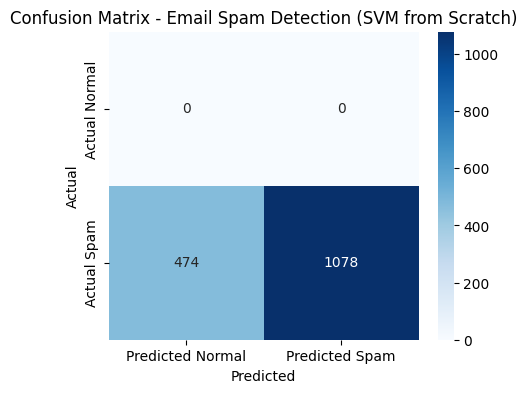

In [ ]:
#ASS19. Implement an Email Spam Detection model from scratch using the Support Vector Machine
#(SVM) algorithm for binary classification, where emails are labeled as Normal (Not Spam) or
#Abnormal (Spam). Analyze model performance using appropriate evaluation metrics.

# ===============================================================
# Email Spam Detection using SVM (from scratch, RBF Kernel)
# ===============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------------------
# 1. Load Dataset
# -----------------------------------------------------------
df = pd.read_csv("email.csv")
print("Dataset Loaded Successfully! Shape:", df.shape)

# -----------------------------------------------------------
# 2. Inspect Data
# -----------------------------------------------------------
print("\nColumns:", list(df.columns[:10]), "...")
print("\nAny NaN in data?", df.isna().sum().any())

# -----------------------------------------------------------
# 3. Separate Features and Target
# -----------------------------------------------------------
X = df.drop(columns=["Prediction", "Email No."])
y = df["Prediction"]

# Drop NaN rows
combined = pd.concat([X, y], axis=1).dropna()
X = combined.drop(columns=["Prediction"]).values
y = combined["Prediction"].values

# Encode target (Normal=0 → -1, Spam=1 → +1)
y = np.where(y == 1, 1, -1)

print("Final dataset shape:", X.shape)
print("Target classes:", np.unique(y))

# -----------------------------------------------------------
# 4. Train-Test Split
# -----------------------------------------------------------
split = int(0.7 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Normalize
X_train = (X_train - X_train.mean(axis=0)) / (X_train.std(axis=0) + 1e-8)
X_test = (X_test - X_train.mean(axis=0)) / (X_train.std(axis=0) + 1e-8)

# -----------------------------------------------------------
# 5. Define RBF Kernel Function
# -----------------------------------------------------------
def rbf_kernel(x1, x2, gamma=0.05):
    return np.exp(-gamma * np.linalg.norm(x1 - x2) ** 2)

# -----------------------------------------------------------
# 6. SVM (from Scratch)
# -----------------------------------------------------------
class SVM_RBF:
    def __init__(self, C=1.0, gamma=0.05, lr=0.001, epochs=100):
        self.C = C
        self.gamma = gamma
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.alpha = np.zeros(n_samples)
        self.b = 0
        self.X = X
        self.y = y

        # Precompute Kernel Matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = rbf_kernel(X[i], X[j], self.gamma)
        self.K = K

        # Gradient Descent Optimization
        for _ in range(self.epochs):
            for i in range(n_samples):
                margin = np.sum(self.alpha * y * K[:, i]) + self.b
                if y[i] * margin < 1:
                    self.alpha[i] += self.lr * (1 - y[i] * margin)
                else:
                    self.alpha[i] -= self.lr * self.C * self.alpha[i]
            self.b += self.lr * np.sum(y - np.sum(self.alpha * y * K, axis=0))

    def project(self, X):
        y_pred = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            s = 0
            for alpha, y_i, x_i in zip(self.alpha, self.y, self.X):
                if alpha > 1e-6:
                    s += alpha * y_i * rbf_kernel(X[i], x_i, self.gamma)
            y_pred[i] = s
        return y_pred + self.b

    def predict(self, X):
        return np.sign(self.project(X))

# -----------------------------------------------------------
# 7. Train the Model
# -----------------------------------------------------------
svm = SVM_RBF(C=1.0, gamma=0.05, lr=0.001, epochs=80)
svm.fit(X_train, y_train)

# -----------------------------------------------------------
# 8. Predict on Test Set
# -----------------------------------------------------------
y_pred = svm.predict(X_test)

# -----------------------------------------------------------
# 9. Evaluate Model
# -----------------------------------------------------------
TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == -1) & (y_pred == -1))
FP = np.sum((y_test == -1) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == -1))

precision = TP / (TP + FP + 1e-6)
recall = TP / (TP + FN + 1e-6)
f1 = 2 * precision * recall / (precision + recall + 1e-6)
accuracy = (TP + TN) / len(y_test)

print("\nConfusion Matrix (Normal / Spam):")
print(f"TP: {TP}, FP: {FP}")
print(f"FN: {FN}, TN: {TN}")

print("\nEvaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

# -----------------------------------------------------------
# 10. Confusion Matrix Visualization
# -----------------------------------------------------------
cm = np.array([[TP, FP],
               [FN, TN]])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Spam'],
            yticklabels=['Actual Normal', 'Actual Spam'])
plt.title("Confusion Matrix - Email Spam Detection (SVM from Scratch)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

First 5 rows of the dataset:

  Student_ID  Gender  Study_Hours_per_Week  Attendance_Rate  Internal_Scores  \
0       S147    Male                    31        68.267841               86   
1       S136    Male                    16        78.222927               73   
2       S209  Female                    21        87.525096               74   
3       S458  Female                    27        92.076483               99   
4       S078  Female                    37        98.655517               63   

  Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  \
0              High School                     Yes                        Yes   
1                      PhD                      No                         No   
2                      PhD                     Yes                         No   
3                Bachelors                      No                         No   
4                  Masters                      No                        Yes   

  

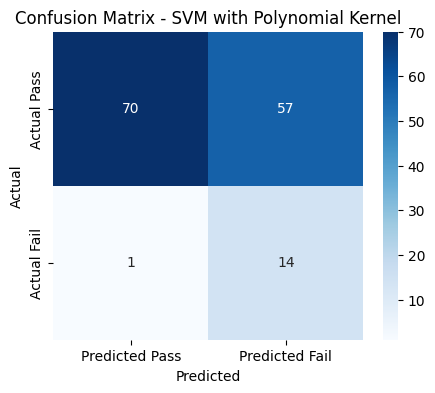

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("student.csv")

# Print the first 5 rows of the dataset
print("First 5 rows of the dataset:\n")
print(data.head())

# Select relevant numeric features
features = ['Study_Hours_per_Week', 'Attendance_Rate', 'Internal_Scores']
target = 'Pass_Fail'

# Encode target variable: Pass=1, Fail=-1
data[target] = data[target].map({'Pass': 1, 'Fail': -1})

# Extract feature matrix and labels
X = data[features].values
y = data[target].values

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Train-test split (80-20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define polynomial kernel
def polynomial_kernel(x1, x2, degree=3, coef0=1):
    return (np.dot(x1, x2) + coef0) ** degree

# SVM with Polynomial Kernel (from scratch, no sklearn)
class SVM_Polynomial:
    def __init__(self, C=1.0, degree=3, lr=0.001, epochs=1000):
        self.C = C
        self.degree = degree
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples)
        self.b = 0
        self.X = X
        self.y = y

        # Compute Gram matrix (Kernel Matrix)
        self.K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                self.K[i, j] = polynomial_kernel(X[i], X[j], self.degree)

        # Gradient-based training
        for _ in range(self.epochs):
            for i in range(n_samples):
                condition = y[i] * (np.sum(self.alpha * y * self.K[:, i]) + self.b) < 1
                if condition:
                    self.alpha[i] += self.lr * (1 - y[i] * (np.sum(self.alpha * y * self.K[:, i]) + self.b))
                else:
                    self.alpha[i] -= self.lr * self.C * self.alpha[i]
            self.b += self.lr * np.sum(y - np.sum(self.alpha * y * self.K, axis=0))

    def project(self, X):
        y_predict = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            s = 0
            for alpha, y_i, x_i in zip(self.alpha, self.y, self.X):
                if alpha > 1e-6:
                    s += alpha * y_i * polynomial_kernel(X[i], x_i, self.degree)
            y_predict[i] = s
        return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

# Train the SVM model
svm_poly = SVM_Polynomial(C=1.0, degree=3, lr=0.001, epochs=500)
svm_poly.fit(X_train, y_train)

# Predict on test set
y_pred = svm_poly.predict(X_test)

# Evaluation metrics
TP = np.sum((y_test == 1) & (y_pred == 1))
TN = np.sum((y_test == -1) & (y_pred == -1))
FP = np.sum((y_test == -1) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == -1))

precision = TP / (TP + FP + 1e-6)
recall = TP / (TP + FN + 1e-6)
f1 = 2 * precision * recall / (precision + recall + 1e-6)

print("\nConfusion Matrix:")
print(f"TP: {TP}, FP: {FP}")
print(f"FN: {FN}, TN: {TN}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Confusion Matrix Visualization
cm = np.array([[TP, FP],
               [FN, TN]])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Pass', 'Predicted Fail'],
            yticklabels=['Actual Pass', 'Actual Fail'])
plt.title("Confusion Matrix - SVM with Polynomial Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

First 5 rows of dataset:

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  .

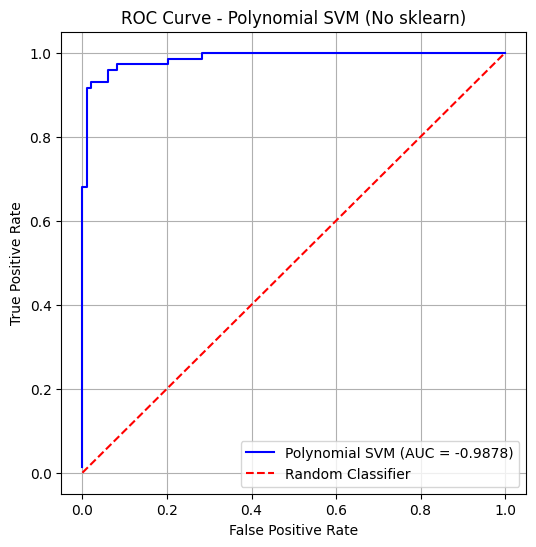

In [ ]:
#ASS21. Develop an SVM classifier from scratch using a Polynomial Kernel on the Breast Cancer
#Wisconsin Dataset to distinguish between benign and malignant tumors.
#Evaluate the classifier using a confusion matrix and ROC curve to analyze diagnostic accuracy.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------
#  Load the dataset
# --------------------------------------------
data = pd.read_csv("cancer.csv")

# Drop ID/unnecessary columns
data = data.drop(columns=[col for col in data.columns if 'id' in col.lower() or 'Unnamed' in col])

# Encode target
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': -1})

# Print first 5 rows
print("First 5 rows of dataset:\n")
print(data.head(), "\n")

# Split features and labels
X = data.drop(columns=['diagnosis']).values
y = data['diagnosis'].values

# Normalize data (mean 0, std 1)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split into train/test
np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)
split = int(0.7 * len(X))
train_idx, test_idx = indices[:split], indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# --------------------------------------------
# Define Polynomial Kernel
# --------------------------------------------
def polynomial_kernel(x1, x2, degree=3, c=1):
    return (np.dot(x1, x2.T) + c) ** degree


# --------------------------------------------
# Train Polynomial SVM (Dual form simplified)
# --------------------------------------------
class PolynomialSVM:
    def __init__(self, C=1.0, degree=3, c=1.0, tol=1e-3, max_iter=1000):
        self.C = C
        self.degree = degree
        self.c = c
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples)
        self.b = 0

        # Precompute the kernel matrix
        K = polynomial_kernel(X, X, self.degree, self.c)

        for _ in range(self.max_iter):
            alpha_prev = np.copy(self.alpha)
            for i in range(n_samples):
                f_i = np.sum(self.alpha * y * K[:, i]) + self.b
                E_i = f_i - y[i]

                if (y[i]*E_i < -self.tol and self.alpha[i] < self.C) or (y[i]*E_i > self.tol and self.alpha[i] > 0):
                    j = np.random.randint(0, n_samples)
                    while j == i:
                        j = np.random.randint(0, n_samples)

                    f_j = np.sum(self.alpha * y * K[:, j]) + self.b
                    E_j = f_j - y[j]

                    alpha_i_old = self.alpha[i]
                    alpha_j_old = self.alpha[j]

                    if y[i] != y[j]:
                        L = max(0, self.alpha[j] - self.alpha[i])
                        H = min(self.C, self.C + self.alpha[j] - self.alpha[i])
                    else:
                        L = max(0, self.alpha[i] + self.alpha[j] - self.C)
                        H = min(self.C, self.alpha[i] + self.alpha[j])
                    if L == H:
                        continue

                    eta = 2 * K[i, j] - K[i, i] - K[j, j]
                    if eta >= 0:
                        continue

                    self.alpha[j] -= y[j] * (E_i - E_j) / eta
                    self.alpha[j] = np.clip(self.alpha[j], L, H)

                    self.alpha[i] += y[i]*y[j]*(alpha_j_old - self.alpha[j])

                    b1 = self.b - E_i - y[i]*(self.alpha[i]-alpha_i_old)*K[i, i] - y[j]*(self.alpha[j]-alpha_j_old)*K[i, j]
                    b2 = self.b - E_j - y[i]*(self.alpha[i]-alpha_i_old)*K[i, j] - y[j]*(self.alpha[j]-alpha_j_old)*K[j, j]

                    if 0 < self.alpha[i] < self.C:
                        self.b = b1
                    elif 0 < self.alpha[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2)/2

            diff = np.linalg.norm(self.alpha - alpha_prev)
            if diff < self.tol:
                break

        # Store support vectors
        self.support_ = np.where(self.alpha > 1e-5)[0]
        self.X = X
        self.y = y

    def project(self, X):
        K = polynomial_kernel(X, self.X[self.support_], self.degree, self.c)
        return np.dot(K, self.alpha[self.support_] * self.y[self.support_]) + self.b

    def predict(self, X):
        return np.sign(self.project(X))


# --------------------------------------------
# Train and Evaluate
# --------------------------------------------
svm_poly = PolynomialSVM(C=1.0, degree=3, c=1.0, max_iter=200)
svm_poly.fit(X_train, y_train)

y_pred = svm_poly.predict(X_test)

# --------------------------------------------
# Manual Evaluation Metrics
# --------------------------------------------
def confusion_matrix_manual(y_true, y_pred):
    tp = tn = fp = fn = 0
    for t, p in zip(y_true, y_pred):
        if t == 1 and p == 1:
            tp += 1
        elif t == -1 and p == -1:
            tn += 1
        elif t == -1 and p == 1:
            fp += 1
        elif t == 1 and p == -1:
            fn += 1
    return np.array([[tp, fn], [fp, tn]])

cm = confusion_matrix_manual(y_test, y_pred)
tp, fn, fp, tn = cm[0,0], cm[0,1], cm[1,0], cm[1,1]

precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print("Confusion Matrix:")
print(cm)
print(f"\nAccuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

# --------------------------------------------
# ROC Curve + AUC manually
# --------------------------------------------
scores = svm_poly.project(X_test)
sorted_indices = np.argsort(scores)
y_sorted = y_test[sorted_indices]

tpr_list = []
fpr_list = []

P = sum(y_test == 1)
N = sum(y_test == -1)

for thresh in scores[sorted_indices]:
    y_pred_thresh = np.where(scores >= thresh, 1, -1)
    tp = np.sum((y_test == 1) & (y_pred_thresh == 1))
    fp = np.sum((y_test == -1) & (y_pred_thresh == 1))
    tpr = tp / P
    fpr = fp / N
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Updated for deprecation warning
auc_value = np.trapezoid(tpr_list, fpr_list)

# Plot ROC
plt.figure(figsize=(6,6))
plt.plot(fpr_list, tpr_list, color='blue', label=f'Polynomial SVM (AUC = {auc_value:.4f})')
plt.plot([0,1],[0,1],'r--',label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Polynomial SVM (No sklearn)')
plt.legend()
plt.grid(True)
plt.show()